# Pymaceuticals Inc.
---

### Analysis
Ramican and Capomulan were the regimens used the most based on bar chart.
 

In [45]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, how='outer')

# Display the data table for preview
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
mice=merged_data["Mouse ID"].value_counts()
mice_count=len(mice)
mice_count

249

In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = merged_data.loc[merged_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate

array(['g989'], dtype=object)

In [23]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse=merged_data.loc[merged_data["Mouse ID"] == "g989", :]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [21]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = merged_data[merged_data['Mouse ID'].isin(duplicate)==False]
cleaned_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [26]:
# Checking the number of mice in the clean DataFrame.
clean_check = cleaned_data["Mouse ID"].nunique()

clean_check

248

## Summary Statistics

In [29]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

tumor_volume_mean = cleaned_data.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)'].rename('Mean Tumor Volume')

tumor_volume_median = cleaned_data.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)'].rename('Median Tumor Volume')

tumor_volume_var = cleaned_data.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)'].rename('Tumor Volume Variance')

tumor_volume_std = cleaned_data.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)'].rename('Tumor Volume Std. Dev.')

tumor_volume_sem = cleaned_data.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)'].rename('Tumor Volume Std. Err.')

# Assemble the resulting series into a single summary dataframe.
statistics_df = pd.DataFrame({"Mean Tumor Volume" : tumor_volume_mean,
                           'Median Tumor Volume' : tumor_volume_median,
                           'Tumor Volume Variance': tumor_volume_var,
                           'Tumor Volume Std. Dev.' : tumor_volume_std,
                           'Tumor Volume Std. Err.' : tumor_volume_sem})
statistics_df.head(10)

/var/folders/z0/2mtt5sd943l2v0___jxntk4r0000gn/T/ipykernel_7649/1870306885.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tumor_volume_mean = cleaned_data.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)'].rename('Mean Tumor Volume')
/var/folders/z0/2mtt5sd943l2v0___jxntk4r0000gn/T/ipykernel_7649/1870306885.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tumor_volume_median = cleaned_data.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)'].rename('Median Tumor Volume')
/var/folders/z0/2mtt5sd943l2v0___jxntk4r0000gn/T/ipykernel_7649/1870306885.py:10: FutureWarning: The default value of nu

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [30]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_df = cleaned_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean','median','var', 'std', 'sem'])
agg_df.head()

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

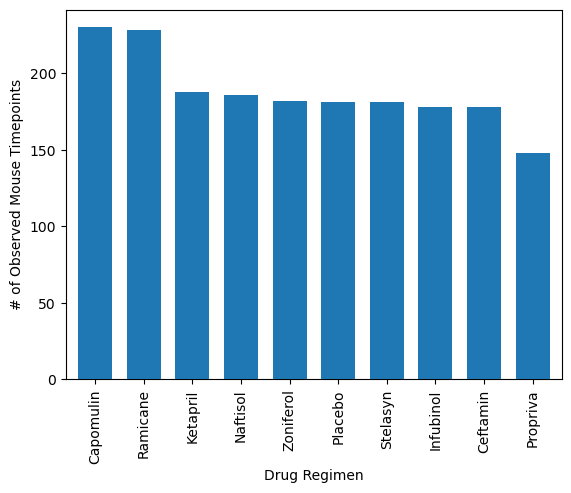

In [42]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_plot = cleaned_data['Drug Regimen'].value_counts().plot.bar(width=0.7, zorder=3)

bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel("# of Observed Mouse Timepoints")



bar_plot

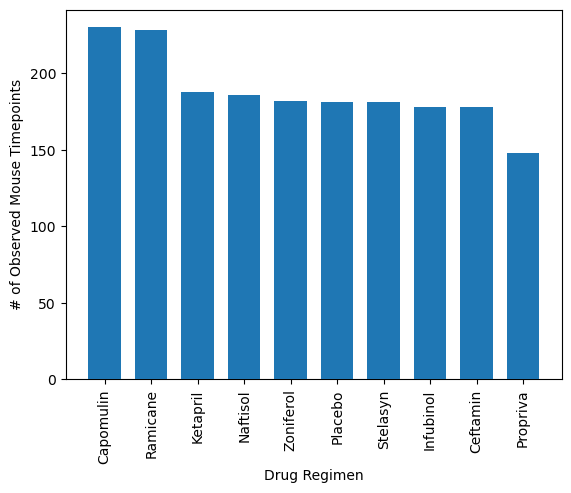

In [46]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
counts = cleaned_data['Drug Regimen'].value_counts()


x_axis = np.arange(len(counts))


plt.bar(x_axis, counts, width = 0.7, zorder=3)


tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, counts.index.values)


plt.xticks(rotation=90)


plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")


plt.show()

Text(0, 0.5, 'Sex')

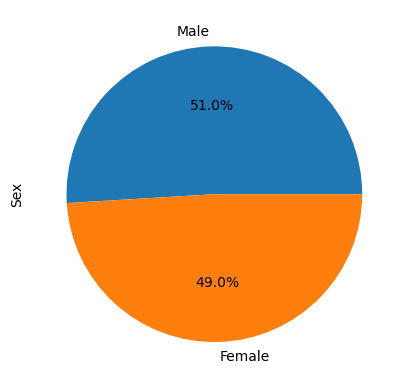

In [50]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
data = cleaned_data['Sex'].value_counts()


pie_plot = data.plot.pie(autopct="%1.1f%%", startangle=360)


pie_plot.set_ylabel('Sex')

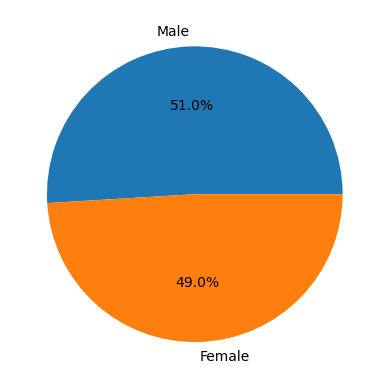

In [51]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

data = cleaned_data['Sex'].value_counts()

plt.pie(data, labels=data.index.values, autopct="%1.1f%%", startangle=360)

plt.show()

## Quartiles, Outliers and Boxplots

In [55]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint_df = cleaned_data.groupby(['Mouse ID'])['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_timepoint_df = greatest_timepoint_df.merge(cleaned_data,on=['Mouse ID','Timepoint'], how='left')
print(merged_timepoint_df.head())

regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

for name in range(len(regimens)):
    temp = merged_timepoint_df[merged_timepoint_df['Drug Regimen'] == regimens[name]]
   

  Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0     a203         45    Infubinol  Female          20          23   
1     a251         45    Infubinol  Female          21          25   
2     a262         45      Placebo  Female          17          29   
3     a275         45     Ceftamin  Female          20          28   
4     a366         30     Stelasyn  Female          16          29   

   Tumor Volume (mm3)  Metastatic Sites  
0           67.973419                 2  
1           65.525743                 1  
2           70.717621                 4  
3           62.999356                 3  
4           63.440686                 1  


In [78]:
# Put treatments into a list for for loop (and later for plot labels)
tumor_volume_data = {'Capomulin': [],
                  'Ramicane': [],
                   'Infubinol': [], 
                   'Ceftamin': []}

# Create empty list to fill with tumor vol data (for plotting)
relevant_tumor = []

# Loop thru treatments
for name in regimens:
    # Loop thru regiments highest timepoint data
    for i in merged_timepoint_df.index:
        # Append the tumor volume to the list
        if merged_timepoint_df.iloc[i]['Drug Regimen'] == name:
            tumor_volume_data[name].append(merged_timepoint_df.iloc[i]['Tumor Volume (mm3)'])
            #max_timepoint_df['Mouse ID','Timepoint','Drug Regumen','Tumor Volume (mm3)']
            #tumor_vol.append(max_timepoint_df.iloc[i]['Mouse ID','Timepoint','Drug Regumen','Tumor Volume (mm3)'])
            
# Create a new data frame added all values in
tumor_df = pd.DataFrame(tumor_volume_data)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for name in regimens:
    # Add subset
    subset = merged_timepoint_df[merged_timepoint_df['Drug Regimen']== name]
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    quartiles = subset['Tumor Volume (mm3)'].quantile([0.25,0.5,0.75])
    first_quartile = quartiles[0.25]
    second_quartile = quartiles[0.5]
    third_quartile = quartiles[0.75]
    iqr = third_quartile - first_quartile
    # Bounds
    lower_bound = first_quartile - (1.5*iqr)
    upper_bound = third_quartile + (1.5 *iqr)
    
    # Determine outliers using upper and lower bounds
    outliers = merged_timepoint_df.loc[(merged_timepoint_df['Tumor Volume (mm3)'] <= lower_bound) | (merged_timepoint_df['Tumor Volume (mm3)'] >= upper_bound)]
print(outliers)


    Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
96      k403         45     Ramicane    Male          21          16   
174     s185         45    Capomulin  Female           3          17   

     Tumor Volume (mm3)  Metastatic Sites  
96            22.050126                 1  
174           23.343598                 1  


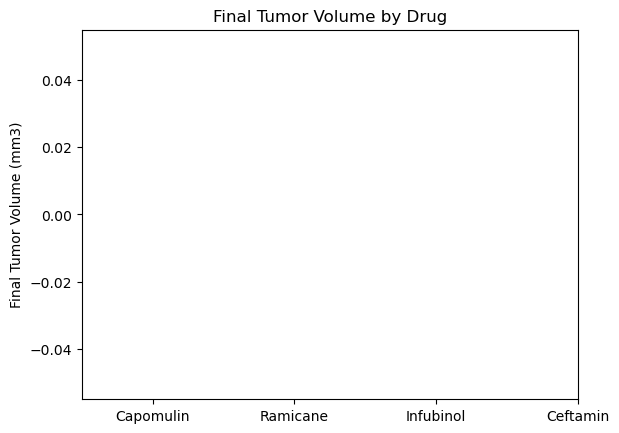

In [71]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
flierprops = dict(marker='o', markerfacecolor='r', markersize=8, markeredgecolor='black')


plt.boxplot(relevant_tumor, flierprops=flierprops)


plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()

## Line and Scatter Plots

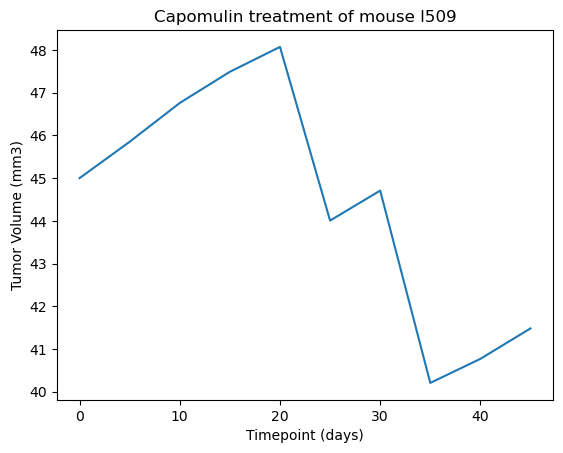

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


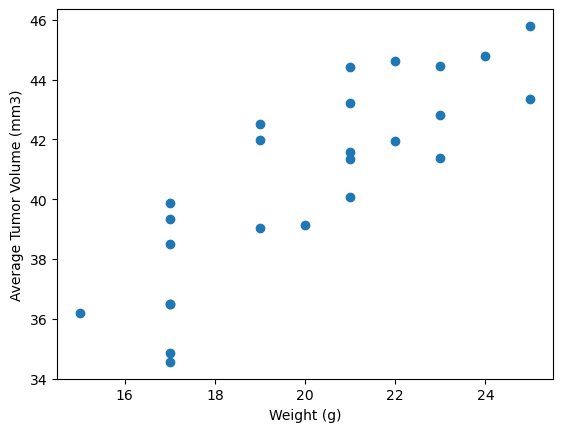

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


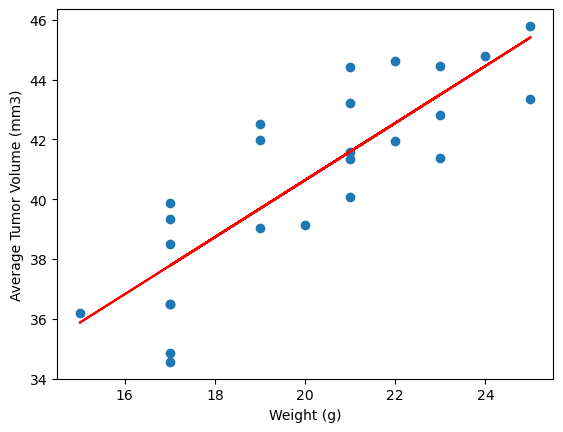

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
